### REGRESSION ANALYSIS - to forecast/ predict monthly income.

In [1]:
# import necessary libraries

# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# classifier libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\train_data2.csv")

In [3]:
#dropping off some redundant features - unique identifiers
df.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber', 'Attrition', 'MonthlyRate'],axis=1,inplace=True)

In [4]:
#creating a copy of the dataset for part B
df1 = df.copy()
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [5]:
#creating a copy of the dataset for part B
df3 = df1.copy()
df3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [6]:
#encode the categorical features to numerical ones
df3 = pd.get_dummies(df3, drop_first=True)
df3.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False


In [7]:
#segment dataset into data and target label
target = df3.pop('MonthlyIncome')

In [8]:
# scale dataset features
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df3),columns=df3.columns)
df_scaled

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.888889,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.111111,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.111111,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0.928571,0.216893,0.000000,0.25,0.333333,0.900000,1.000000,0.25,0.666667,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1054,0.738095,0.993558,0.214286,0.75,0.666667,0.071429,0.666667,0.50,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1055,0.380952,0.520401,0.500000,0.50,0.333333,0.585714,0.666667,0.75,0.000000,0.777778,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1056,0.238095,0.997853,0.000000,0.50,0.000000,0.885714,0.666667,0.00,0.666667,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


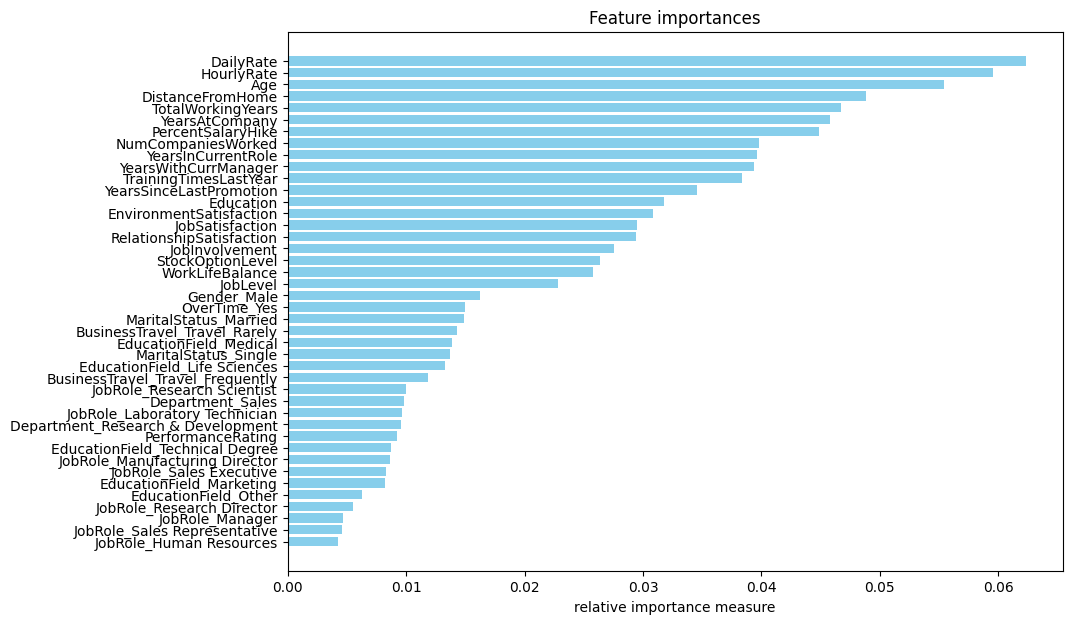

In [9]:
#identifying key featurs from the data set

# using a random classifier model to identify the importance features

# fit the model
model = RandomForestClassifier()
model.fit(df_scaled,target)
importances = model.feature_importances_
sort_imp = np.argsort(importances)
names = list(df3.columns)

#plot feature importance chart
plt.figure(figsize=(10,7))
plt.barh(range(len(sort_imp)),importances[sort_imp], color="skyblue")
plt.yticks(range(len(sort_imp)),[names[x] for x in sort_imp])
plt.title("Feature importances")
plt.xlabel("relative importance measure");

#### daily rate, hourly rate, age, distance from home and total working years are the top 5 factors influencing monthly income of employees 

In [10]:
# split the DataFrame into train and test datasets
x_train,x_test,y_train,y_test = train_test_split(df_scaled,target,test_size=0.2,random_state=1)

In [11]:
# Fit a linear regression model on the training set
from sklearn.linear_model import LinearRegression
#instantiate model
lg = LinearRegression()

#fit model (training model)
lg.fit(x_train,y_train)

LinearRegression()

In [12]:
lg_pred = lg.predict(x_test)

In [13]:
# Evaluate the model using the test data
mse = mean_squared_error(y_test, lg_pred)
r2 = r2_score(y_test, lg_pred)
rmse = np.sqrt(mse)

print(f"R-squared score {r2}")
print(f"Mean squared error score {mse}")
print(f"Root mean squared error score {rmse}")

R-squared score 0.9536220127061029
Mean squared error score 1092799.0664680249
Root mean squared error score 1045.3703011220593


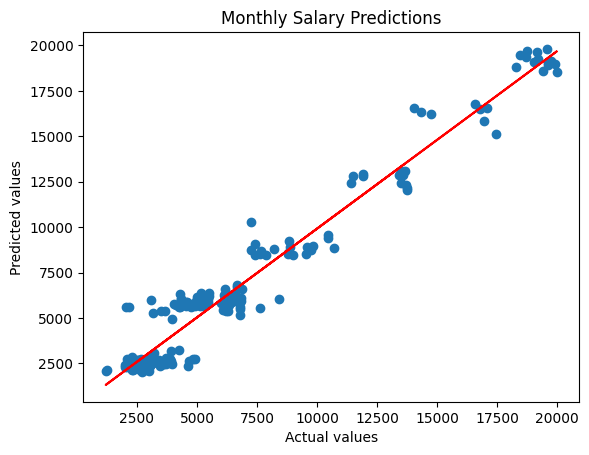

In [14]:
# Plot predicted vs actual
plt.scatter(y_test, lg_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Monthly Salary Predictions")

# Overlay the regression line
z = np.polyfit(y_test, lg_pred, 1)  # Fit a first-degree polynomial (line) to the data
p = np.poly1d(z)  # Create a polynomial object
plt.plot(y_test, p(y_test), color="red")  # Plot the regression line
plt.show();

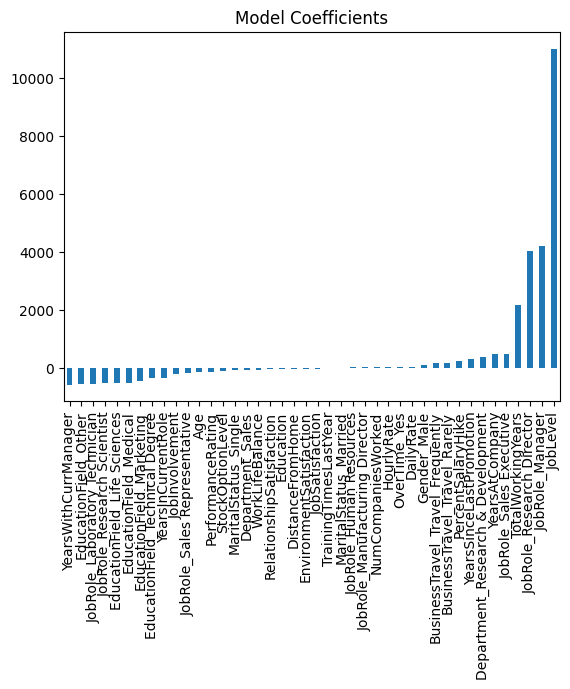

In [15]:
# visualizing model coefficients
predictors = x_train.columns
coef = pd.Series(lg.coef_, index=predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients');

### Hyper Parameter 0ptimization - GradientBoostingRegressor model

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Use a Gradient Boosting algorithm for regression
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 150]
}

# Find the best hyperparameter combination to optimize the R2 metric

# Define the scorer
scorer = make_scorer(r2_score)

# Perform grid search
grid = GridSearchCV(alg, params, scoring=scorer, cv=3)
grid.fit(x_train, y_train)

print("Best parameter combination:", grid.best_params_, "\n")
# measuring performance on test set
print("Applying best model on test data:")
best_mod = grid.best_estimator_
pred = best_mod.predict(x_test)
# Evaluate the model using the test data
mse1 = mean_squared_error(y_test, pred)
r21 = r2_score(y_test, pred)
rmse1 = np.sqrt(mse1)

print(f"R-squared score {r21}")
print(f"Mean squared error score {mse1}")
print(f"Root mean squared error score {rmse1}")

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

Applying best model on test data:
R-squared score 0.96327295078079
Mean squared error score 865395.1463339871
Root mean squared error score 930.2661696170549


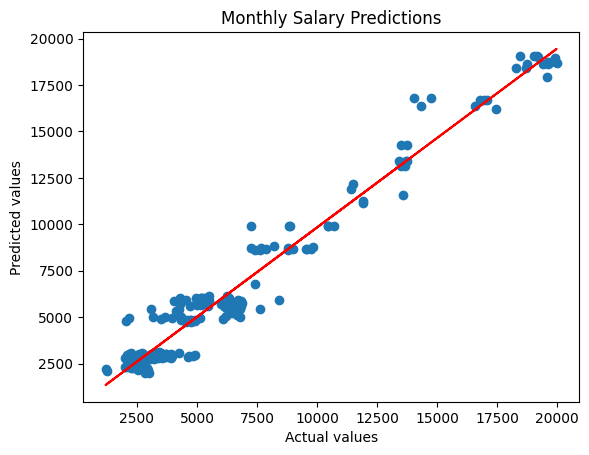

In [17]:
# Plot predicted vs actual
plt.scatter(y_test, pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Monthly Salary Predictions")

# Overlay the regression line
z = np.polyfit(y_test, pred, 1)  # Fit a first-degree polynomial (line) to the data
p = np.poly1d(z)  # Create a polynomial object
plt.plot(y_test, p(y_test), color="red")  # Plot the regression line
plt.show();

### The optimzed model - - GradientBoostingRegressor model have a higher R-squared score. Hence, it is the most preferred model suitable for predicting the monthly income of employees

### Productionizing Our Model - simulating the use of the model on a new dataset and using it to make relevant predictions

In [18]:
predict_data = pd.read_excel(r"C:\Users\hp\Downloads\test.xlsx")

In [19]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       412 non-null    int64 
 1   BusinessTravel            412 non-null    object
 2   DailyRate                 412 non-null    int64 
 3   Department                412 non-null    object
 4   DistanceFromHome          412 non-null    int64 
 5   Education                 412 non-null    int64 
 6   EducationField            412 non-null    object
 7   EmployeeCount             412 non-null    int64 
 8   EmployeeNumber            412 non-null    int64 
 9   EnvironmentSatisfaction   412 non-null    int64 
 10  Gender                    412 non-null    object
 11  HourlyRate                412 non-null    int64 
 12  JobInvolvement            412 non-null    int64 
 13  JobLevel                  412 non-null    int64 
 14  JobRole                   

In [20]:
#Productionizing the best performing model
# Serializing the best model for subsequent and easy usage
import joblib

# Save the model as a pickle file
filename = './optimized_mod.pkl'
joblib.dump(best_mod, filename)

['./optimized_mod.pkl']

In [21]:
#apply transforms to the new data similar to the training dataset
predict_data.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'], axis=1, inplace=True)
predict_data = pd.get_dummies(predict_data, drop_first=True)

In [22]:
# inferencing
prediction = best_mod.predict(predict_data)
predict_data['PredictedIncome'] = prediction

In [23]:
predict_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PredictedIncome
0,34,790,24,4,1,40,2,2,2,0,...,False,False,False,False,True,False,False,True,True,16142.300722
1,35,660,7,1,4,76,3,1,3,1,...,False,False,False,False,False,True,True,False,False,15944.622684
2,24,381,9,3,2,89,3,1,1,2,...,False,False,False,False,False,False,False,True,True,15349.369251
3,24,830,13,2,4,78,3,1,2,1,...,False,False,False,False,False,True,True,False,False,15944.622684
4,44,1193,2,1,2,86,3,3,3,5,...,False,True,False,False,False,False,False,True,True,16442.047404
